In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

# Torchtext 기본 활용

- 불용어처리 
- 저번시간 복습
- torchtext 활용
- 카카오 Pororo

### 불용어(stopword)

- 자연어처리를 하며 유의미한 단어 토큰만을 선별하기 위해 큰 의미가 없는 단어 토큰을 제거하는 작업
- 문장 내에서는 자주 등장하지만 문장을 분석하는 데 있어서는 큰 도움이 되지 않는 단어 ex) I,me,my - 조사,접미사
- 효율 감소, 처리시간 증가
- 주의 사항: 불용어를 잘못 선택하고 제거하면 텍스트의 의미가 변할 수 있음

### 불용어를 언제 제거해야되는지?

- 불용어 제거가 좋은 경우
  - 언어 분류, 스팸 필터링, 캡션 생성, 자동 태그 생성, 감정 분석 또는 텍스트 분류

- 불용어 제거를 하지 않는 것이 좋은 경우
  - 기계 번역, 질문-답변 문제, 텍스트 요약

In [12]:
pip install nltk&> /dev/null

In [ ]:
import nltk
nltk.download('all')

### 불용어 제거하는 단계

- 모든 단어를 소문자화한다.
- 불용어 사전을 검색하여 불용어를 삭제한다.
- 전체 말뭉치(corpus)에서 n번 이상 등장하지 않는 단어를 삭제한다.
  - why? 별로 중요한 단어라고 생각하지 않기 때문이다.

In [26]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = '고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삽겹살을 구울 때는 중요한게 있지'

stop_words = '하면 다 예컨대'

stop_words = stop_words.split(' ')
word_tokens = word_tokenize(text)

result = []
for i in word_tokens:
  if i not in stop_words:
    result.append(i)

print(word_tokens)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삽겹살을', '구울', '때는', '중요한게', '있지']
['고기를', '아무렇게나', '구우려고', '안', '돼', '.', '고기라고', '같은', '게', '아니거든', '.', '삽겹살을', '구울', '때는', '중요한게', '있지']


### Lemmatization and Stemming의 목적: 
- 정규화 기법 중 코퍼스에 있는 단어의 개수를 줄일 수 있는 기법이다.
- 서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 단어의 수를 줄이겠다는 것이다.
- 자연어 전처리, 더 정확히 정규화의 지향점은 코퍼스로부터 복잡성을 줄이는 일이다.


표제어 추출(Lemmatization)
- 단어들이 서로 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄일 수 있는지 판단하는 것이다
- ex) am,are,is -> 뿌리 단어는 be
- 표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것. 형태소'의미를 가진 가장 작은 단위'이다.
- 형태소
  - stem(어간): 단어의 의미를 담고 있는 단어의 핵심 부분
  - affix(접사): 단어에 추가적인 의미를 주는 부분
  - ex) forming -> form(stem) -> ing(affix)
- 표제어 추출은 문맥을 고려하며, 수행했을때의 결과는 해당 단어의 품사 정보를 보존한다(POS 태그를 보존)


어간 추출(Stemming)
- 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업. 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않을 수도있다. 
- 단순 규칙에 기반하여 이루어진다. 
-ex) 포터 알고리즘 ANCE->제거 allowance -> allow

In [35]:
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize

s = PorterStemmer()

text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words = word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [34]:
words = ['formalize','allowance','electricial']
print([s.stem(w) for w in words])

['formal', 'allow', 'electrici']


#### 트윗을 토큰화하려면 해시태그, @ , :-) 등 하나의 단위로 인식해야한다. #MakeAMovieCold 해시태크는 토큰이 하나일까?

In [16]:
from nltk.tokenize import TweetTokenizer

tweet = u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"

tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


### Torchtext 제공하는 기능

- File Loading: 다양한 포맷의 코퍼스를 load.
- Tokenization: 문장을 단어 단위로 분리해준다.
- Vocab: 단어 집합을 만들어준다.
- Integer Encoding: 전체 코퍼스의 단어들을 각각의 고유한 정수로 맵핑해준다.
- Word Vector: 단어 집합의 단어들에 고유한 embedding vector를 만들어준다.
- Batcing: 훈련 샘플들의 배치를 만들어준다. 이 과정에서 padding도 이루어진다.

In [17]:
import urllib.request
import pandas as pd

### 훈련 데이터와 테스트 데이터로 다운로드 하기

In [18]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f99fabef550>)

In [19]:
train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')

In [20]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [21]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 자연어 전처리 - 어떤 전처리를 할 것인지 필드 정의하기(torchtext.data)

In [22]:
from torchtext.legacy import data
from konlpy.tag import Mecab

tokenizer = Mecab()

ID = data.Field(sequential = False,
                use_vocab = False)

TEXT = data.Field(sequential=True,                     #if the datatype represents sequential data
                  use_vocab=True,                      # 단어 집합을 만들 것인지, if false 이미 단어가 숫자로 되어 있어야함
                  tokenize=tokenizer.morphs,           # 어떤 토큰화 함수를 사용할 것인지, str.split() -> default
                  lower=True,                          # whether to lower the text
                  batch_first=True,                    # 신경망에 입력되는 텐서의 첫번째 차원값이 batch_size가 되도록
                  fix_length=20)                       # 최대 허용길이

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)



### 데이터셋 만들기
- TabularDatset은 데이터를 불러오면서 필드에서 정의했던 토큰화 방법으로 토큰화를 수행

In [23]:
from torchtext.legacy.data import TabularDataset

train_data,test_data = TabularDataset.splits(path='.', train='ratings_train.txt',test='ratings_test.txt', 
    format='tsv',fields=[('id',ID), ('text',TEXT),('label',LABEL)],skip_header=True)

print(vars(train_data[0])) #주어진 인덱스의 샘플을 확인

{'id': '9976970', 'text': ['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], 'label': '0'}


### 단어 집합(vocabulary) 만들기

In [24]:
TEXT.build_vocab(train_data,min_freq=10,max_size=100) #최소 10번 나온 단어와 단어 집합은 100개

- min_freq: 단어 집합에 추가 시 단어의 최소 등장 빈도 조건을 추가
- max_size: 단어 집합의 최대 크기를 지정

In [25]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f99f7863190>>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '는': 4, '영화': 5, '다': 6, '고': 7, '하': 8, '도': 9, '의': 10, '가': 11, '은': 12, '에': 13, '을': 14, '보': 15, '한': 16, '..': 17, '게': 18, ',': 19, '들': 20, '!': 21, '지': 22, '를': 23, '있': 24, '없': 25, '?': 26, '좋': 27, '나': 28, '었': 29, '만': 30, '는데': 31, '너무': 32, '봤': 33, '적': 34, '안': 35, '정말': 36, '로': 37, '음': 38, '으로': 39, '것': 40, '아': 41, '네요': 42, '재밌': 43, '어': 44, '점': 45, '같': 46, '지만': 47, '진짜': 48, '했': 49, '에서': 50, '기': 51, '네': 52, '않': 53, '거': 54, '았': 55, '수': 56, '되': 57, '면': 58, 'ㅋㅋ': 59, '과': 60, '말': 61, '연기': 62, '인': 63, '잘': 64, '최고': 65, '주': 66, '내': 67, '~': 68, '평점': 69, '이런': 70, '어요': 71, '던': 72, '와': 73, '할': 74, '왜': 75, '1': 76, '겠': 77, '해': 78, '스토리': 79, '습니다': 80, 'ㅋㅋㅋ': 81, '...': 82, '드라마': 83, '생각': 84, '아니': 85, '더': 86, '그': 87, '싶': 88, '사람': 89, '듯': 90, '감동': 91, '때': 92, '함': 93, '배우': 94, '본

- 단어 집합의 크기를 100개로 제한, 임의로 <unk>와 <pad>추가 되면서 0번부터 101번 단어까지 총 102개

### 토치텍스트의 데이터로더 만들기
- Iterator를 사용하여 Dataloader를 만든다.

In [ ]:
from torchtext.legacy.data import Iterator

batch_size = 5

train_loader = Iterator(dataset=train_data,batch_size=batch_size)
test_loader = Iterator(dataset=test_data,batch_size=batch_size)

batch = next(iter(train_loader))
print(batch.text)

#단어 집합에 포함되지 못한 토큰의 번호 0

tensor([[8183,  242,    2,   17,  261,    0,    2,   82,  118,  425,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [2110,   83,  382,   75,  801,  309,   26,   48,   99,   56,   11,   25,
           42,  181, 6591,   16,  102,   20,    3, 7652],
        [  75,   43,    0,  161,   77,    6,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [ 443,  106,   11,   25,    4,  144,  493,  250,    5,    2,   82,   61,
            9,   35,   57,    4,  731,  460,    2,  339],
        [  91,   10, 5767,    2,   82,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1]])


### 카카오브레인 PORORO (2021)
- 다양한 한글 자연어 처리 작업을 위한 pororo 파이썬 라이브러리 릴리스. 
- BERT, Transformer등 파이토치로 구현된 최신 NLP 모델을 사용해 30여 가지의 자연어 처리 작업을 수행

In [ ]:
!pip install pororo&> /dev/null

In [ ]:
from pororo import Pororo

Pororo.available_tasks()

"Available tasks are ['mrc', 'rc', 'qa', 'question_answering', 'machine_reading_comprehension', 'reading_comprehension', 'sentiment', 'sentiment_analysis', 'nli', 'natural_language_inference', 'inference', 'fill', 'fill_in_blank', 'fib', 'para', 'pi', 'cse', 'contextual_subword_embedding', 'similarity', 'sts', 'semantic_textual_similarity', 'sentence_similarity', 'sentvec', 'sentence_embedding', 'sentence_vector', 'se', 'inflection', 'morphological_inflection', 'g2p', 'grapheme_to_phoneme', 'grapheme_to_phoneme_conversion', 'w2v', 'wordvec', 'word2vec', 'word_vector', 'word_embedding', 'tokenize', 'tokenise', 'tokenization', 'tokenisation', 'tok', 'segmentation', 'seg', 'mt', 'machine_translation', 'translation', 'pos', 'tag', 'pos_tagging', 'tagging', 'const', 'constituency', 'constituency_parsing', 'cp', 'pg', 'collocation', 'collocate', 'col', 'word_translation', 'wt', 'summarization', 'summarisation', 'text_summarization', 'text_summarisation', 'summary', 'gec', 'review', 'review_s

### 이미지에서 문자를 읽는 광학 문자 인식

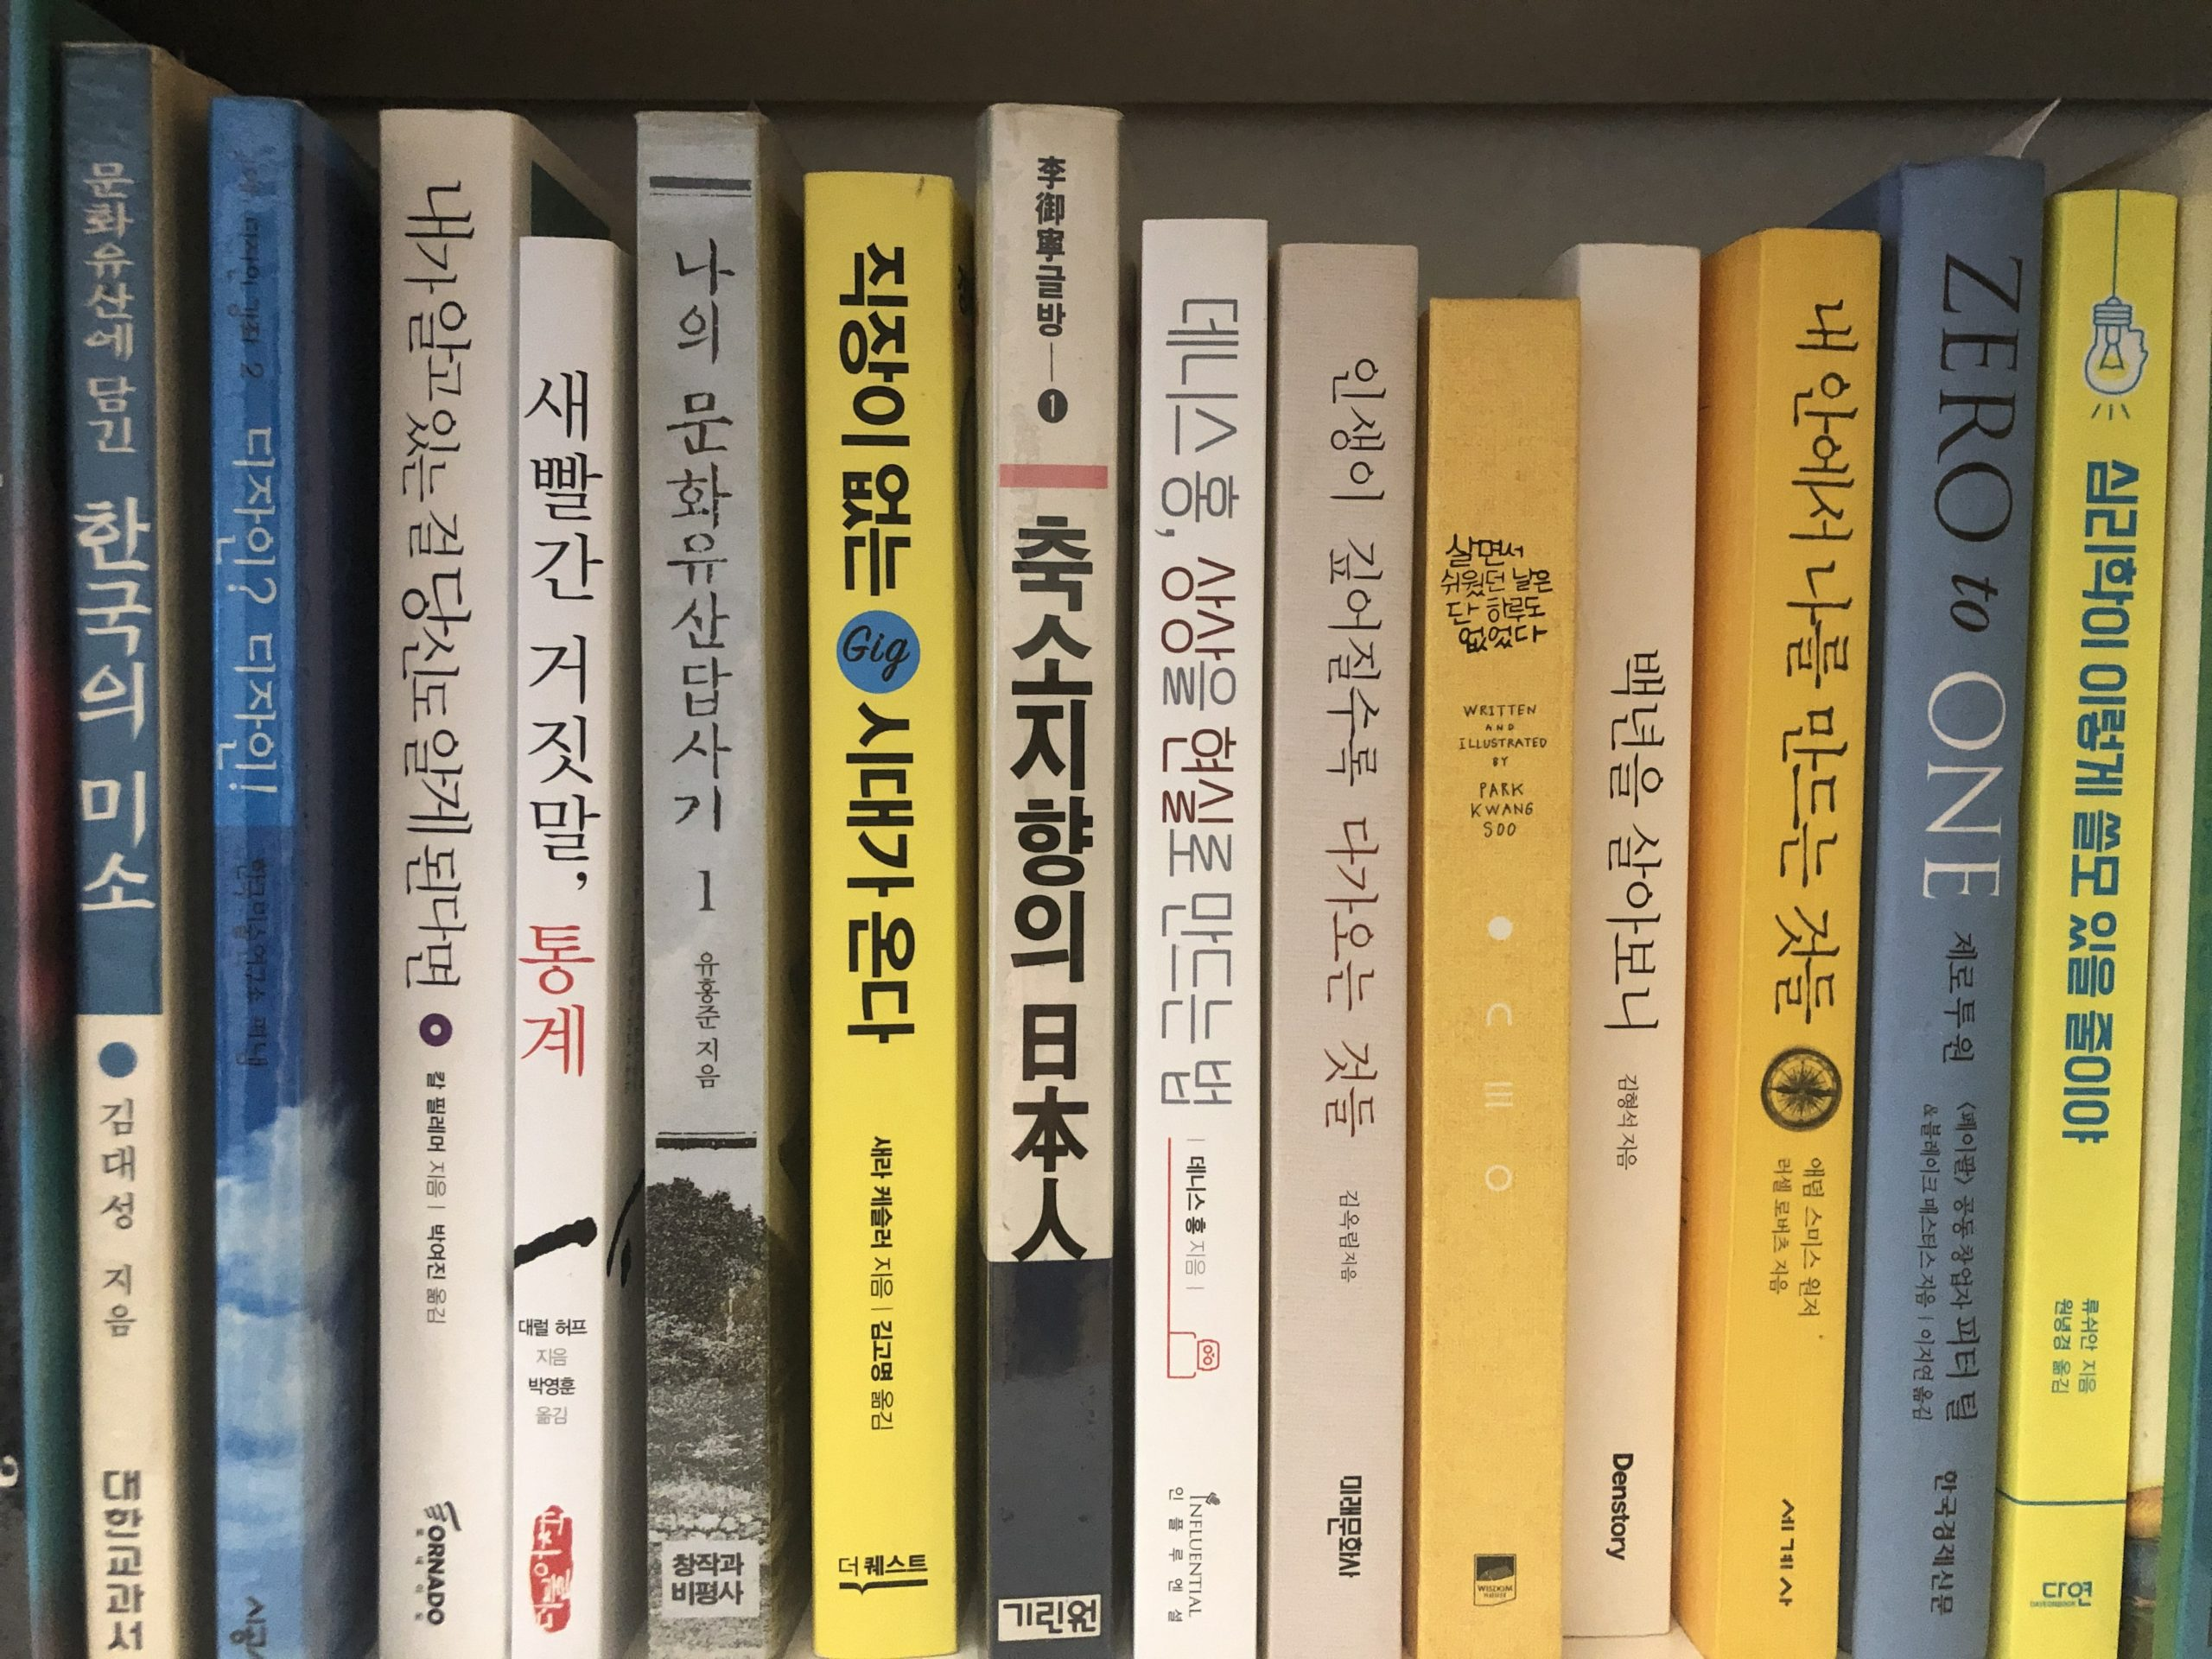

In [ ]:
from IPython.display import Image
Image('book_title.jpeg',width=500,height=500)

In [ ]:
ocr = Pororo(task='ocr')

ocr('book_title.jpeg')

#url도 가능




/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


[" - E체목 은 해 <대는 나의 ' 최장이 문 ' ') '생이 (0UT2  새탁간 없는   복를 0 비다 할레 Gig 상상을 ' 었다 ' WRITTEN   <서일 ' ILLUSTRATED A.N'@ ' Y 백년을 '고 미스] :시대가 KWAN6 fAKK S0o ( ] 필 기타etlgco  '터서 `온다 알아보니 통계 아* 등음 겨내 ' '보위에이 칼 필레머 분K 것들 김형석 자음 &e 높이야 '배성 지음 새라 '첼로 루(이k 박여진 ' 케슬러 법) 27는 김옥팀지움 ' '  공동 겨음 옮린 대럴 허프 지음 김고명 ' 원겨 지음 '리)는 M본 [퐁 리다 등 용 박영훈 옮김 옮일 털 흔험 金 인으 대한교과서 bdnie)@ 루 'run's 바라문묘(' (ojsued <자 창작과 더 퀘스트 [ ~계 비평사 ' 해b*' 기린원 ' 다연"]

### 이미지 캡셔닝

In [ ]:
caption = Pororo(task='caption',lang='ko')

caption('book_title.jpeg')

Downloading: "https://github.com/facebookresearch/detr/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'그 책에 12권이 있는 책장'

### 기계 번역
- 페이스북에서 만든 fairseq TransformerModel사용
- 훈련은 내부 데이터를 사용하고 테스트 데이터는 Multilingual TED 데이터 사용
- 한국어, 영어, 일본어, 중국어
- model 매개변수에 사용할 모델을 지정할 수 있음.
- 기본 모델: 인코더와 디코더가 각각 6개의 층으로 이루어진 transformer.large.multi.mtpg

In [ ]:
mt = Pororo(task='translation', lang='multi')

text1 = '네 혹시 2018년, 111년 만에 최고로 더웠던 여름 기억 나시나요? 이번 여름 더위가 그 수준에 달할 수 있다는 관측도 나오고 있는 상황입니다. 오늘부터 당분간 본격적으로 폭염과 열대야가 기승을 부리겠습니다. 오늘 서울의 낮 기온 34도, 내일은 36도까지 올라 올 들어서 가장 덥겠고요. 일부 지역의 체감온도가 40도 안팎까지도 치솟겠습니다.'

mt(text1, src='ko',tgt='en')

"Do you remember the hottest summer in 2018 and 111 years? There are also observations that this summer's heat could reach that level. From today, the heat wave and tropical nights will rise in earnest for the time being. Today's daytime temperatures will rise to 34 degrees in Seoul and 36 degrees tomorrow, the hottest this year. The temperature of some regions will also surge to around 40 degrees."

In [ ]:
mt = Pororo(task='translation', lang='multi',model='transformer.large.multi.fast.mtpg')

text1 = '네 혹시 2018년, 111년 만에 최고로 더웠던 여름 기억 나시나요? 이번 여름 더위가 그 수준에 달할 수 있다는 관측도 나오고 있는 상황입니다. 오늘부터 당분간 본격적으로 폭염과 열대야가 기승을 부리겠습니다. 오늘 서울의 낮 기온 34도, 내일은 36도까지 올라 올 들어서 가장 덥겠고요. 일부 지역의 체감온도가 40도 안팎까지도 치솟겠습니다.'

mt(text1, src='ko',tgt='en')

"Yeah, do you remember the hottest summer in 2018 and 111 years? There are also observations that the heat could reach that level this summer. From today, heat waves and tropical nights will be on the rise in earnest for the time being. Today's daytime temperatures will rise to 34 degrees Celsius tomorrow and 36 degrees tomorrow. The temperature of some regions will rise to around 40 degrees."

### 텍스트 요약
- SKT에서 개발한 KoBART모델
- abstractive(요약), bullet(짧은 텍스트 요약), extractive(가장 중요한 문장 추출)

In [ ]:
abs_summ = Pororo(task='summary',lang='ko',model='bullet')
abs_summ(text1)

['서울 낮 34도·내일 36도...올 들어 가장 더워', ' 당분간 무더위 기승...폭염·열대야 기승']

### 감정 분석
- RoBERTa 모델
- 긍정과 부정 분류
- 한국어, 일본어

In [ ]:
sa_shop = Pororo(task='sentiment',model='brainbert.base.ko.shopping',lang='ko')

sa_shop('Pororo 공부하기 너무 좋은 날씨이다')

'Positive'

### 자연어 추론
- 두 문장 사이의 관계가 함의(entailment), 모순(contradiction), 중립(neutral)인지 추론.
- 추론 작업의 'nli'로 지정하면 RoBERTa구조 사용
- 한국어, 영어, 일본어, 중국어

In [ ]:
nli = Pororo(task='nli',lang='ko')

nli('비가 온다','날씨가 우중충하다')

'Entailment'

In [ ]:
nli('비가 온다','구름 사이로 햇살이 비친다')

'Contradiction'

In [ ]:
nli('비가 온다','옷이 비에 젖다')

'Neutral'

### 제로샷 토픽 분류
- 주어진 텍스트를 훈련에서 사용하지 않은 처음 본 클래스 레이블에 할당할 수 있음
- "손흥민이 골을 넣었다" 와 "이 문장은 정치에 관한 것이다" 두 문장의 자연어 추론 수행
- 나머지 클래스 레이블에 대해서도 작업을 반복 (추론 4번)
- 수행 결과에서 중립을 빼고 모순과 함의 결과를 소프트맥스 함수에 통과시켜 확률로 변환

In [ ]:
zsl = Pororo(task='zero-topic',lang='ko')

zsl('손흥민이 골을 넣었다',['정치','사회','스포츠','연예'])

{'사회': 10.9, '스포츠': 91.69, '연예': 37.32, '정치': 1.89}